#TESLA (TSLA) Stock Price prediction using Facebook Prophet

In [11]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


###Importing necessary packages/libraries

In [12]:
##%%bash
##python -m pip install prophet

In [13]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [14]:
import plotly.io as pio
pio.renderers.default='colab'

###Importing and Understanding the Data

In [16]:
data = pd.read_csv("/gdrive/My Drive/Colab_Notebooks/TSLA Stock Price Prediction/TSLA.csv")

In [18]:
data.head(n = 20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800
1,2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
2,2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,57163900
3,2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700
4,2022-08-30,287.869995,288.480011,272.649994,277.700012,277.700012,50541800
5,2022-08-31,280.619995,281.250000,271.809998,275.609985,275.609985,52107300
6,2022-09-01,272.579987,277.579987,266.149994,277.160004,277.160004,54287000
7,2022-09-02,281.070007,282.350006,269.079987,270.209991,270.209991,50890100
8,2022-09-06,272.679993,275.989990,265.739990,274.420013,274.420013,55860000
9,2022-09-07,273.100006,283.839996,272.269989,283.700012,283.700012,50028900


In [19]:
data.shape

(252, 7)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [23]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,209.393307,213.882288,204.466429,209.218201,209.218201,1.266563e+08
std,49.054679,49.423988,48.516284,48.874889,48.874889,4.788044e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,9.220765e+07
50%,198.919998,203.474998,193.599998,197.684998,197.684998,1.215680e+08
75%,250.582504,257.717499,244.694996,250.520004,250.520004,1.598709e+08
max,308.290009,313.799988,305.579987,309.070007,309.070007,3.065906e+08


###Data Visulization - Visualizing the Historical Performance of Tesla

In [24]:
px.area(data, x = 'Date', y= 'Close')

In [26]:
px.area(data, x = 'Date', y= 'Volume')

In [27]:
px.box(data, y='Close')

In [34]:
data['co_diff'] = data['Close'] - data['Open']
px.bar(data, x = 'Date', y= 'co_diff')

###Data Preparation

In [35]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,co_diff
0,2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800,-0.466644
1,2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000,-6.289978
2,2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,57163900,-9.339997
3,2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700,1.990020
4,2022-08-30,287.869995,288.480011,272.649994,277.700012,277.700012,50541800,-10.169983
...,...,...,...,...,...,...,...,...
247,2023-08-18,214.119995,217.580002,212.360001,215.490005,215.490005,135813700,1.370010
248,2023-08-21,221.550003,232.130005,220.580002,231.279999,231.279999,135702700,9.729996
249,2023-08-22,240.250000,240.820007,229.550003,233.190002,233.190002,130597900,-7.059998
250,2023-08-23,229.339996,238.979996,229.289993,236.860001,236.860001,100479700,7.520005


In [41]:
prophet_data = pd.DataFrame(data, columns = ["Date", "Close"])

In [42]:
prophet_data = prophet_data.rename(columns =  {'Date':'ds', "Close":'y'})

In [44]:
prophet_data.head(n = 10)

,ds,y
0,2022-08-24,297.096680
1,2022-08-25,296.070007
2,2022-08-26,288.089996
3,2022-08-29,284.820007
4,2022-08-30,277.700012
5,2022-08-31,275.609985
6,2022-09-01,277.160004
7,2022-09-02,270.209991
8,2022-09-06,274.420013
9,2022-09-07,283.700012


### Model Creation

In [45]:
model = Prophet()

In [46]:
model.fit(prophet_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy591d237/r9smmugp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy591d237/3q54ar4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55688', 'data', 'file=/tmp/tmpy591d237/r9smmugp.json', 'init=/tmp/tmpy591d237/3q54ar4m.json', 'output', 'file=/tmp/tmpy591d237/prophet_modelcf_7poly/prophet_model-20230824171411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:14:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:14:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting

In [53]:
future = model.make_future_dataframe(periods = 200)

In [54]:
future

,ds
0,2022-08-24
1,2022-08-25
2,2022-08-26
3,2022-08-29
4,2022-08-30
...,...
612,2024-08-19
613,2024-08-20
614,2024-08-21
615,2024-08-22


In [55]:
forecast = model.predict(future)

In [56]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-24,298.610460,268.593366,329.620993,298.610460,298.610460,0.327194,0.327194,0.327194,0.327194,0.327194,0.327194,0.0,0.0,0.0,298.937654
1,2022-08-25,297.367143,266.337348,331.339049,297.367143,297.367143,-0.474218,-0.474218,-0.474218,-0.474218,-0.474218,-0.474218,0.0,0.0,0.0,296.892925
2,2022-08-26,296.123826,265.499104,326.924744,296.123826,296.123826,0.635383,0.635383,0.635383,0.635383,0.635383,0.635383,0.0,0.0,0.0,296.759210
3,2022-08-29,292.393877,261.891925,324.061309,292.393877,292.393877,1.934878,1.934878,1.934878,1.934878,1.934878,1.934878,0.0,0.0,0.0,294.328755
4,2022-08-30,291.150560,260.064948,321.552450,291.150560,291.150560,-0.009734,-0.009734,-0.009734,-0.009734,-0.009734,-0.009734,0.0,0.0,0.0,291.140826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2024-08-19,492.920048,361.677606,635.682326,362.115783,637.558364,1.934878,1.934878,1.934878,1.934878,1.934878,1.934878,0.0,0.0,0.0,494.854926
613,2024-08-20,493.542012,359.285348,641.875349,362.131910,638.414878,-0.009734,-0.009734,-0.009734,-0.009734,-0.009734,-0.009734,0.0,0.0,0.0,493.532278
614,2024-08-21,494.163977,354.754457,644.203783,361.935926,639.739433,0.327194,0.327194,0.327194,0.327194,0.327194,0.327194,0.0,0.0,0.0,494.491171
615,2024-08-22,494.785941,355.165280,646.968622,361.921873,641.127631,-0.474218,-0.474218,-0.474218,-0.474218,-0.474218,-0.474218,0.0,0.0,0.0,494.311723


In [57]:
px.line(forecast, x = 'ds', y = 'yhat')

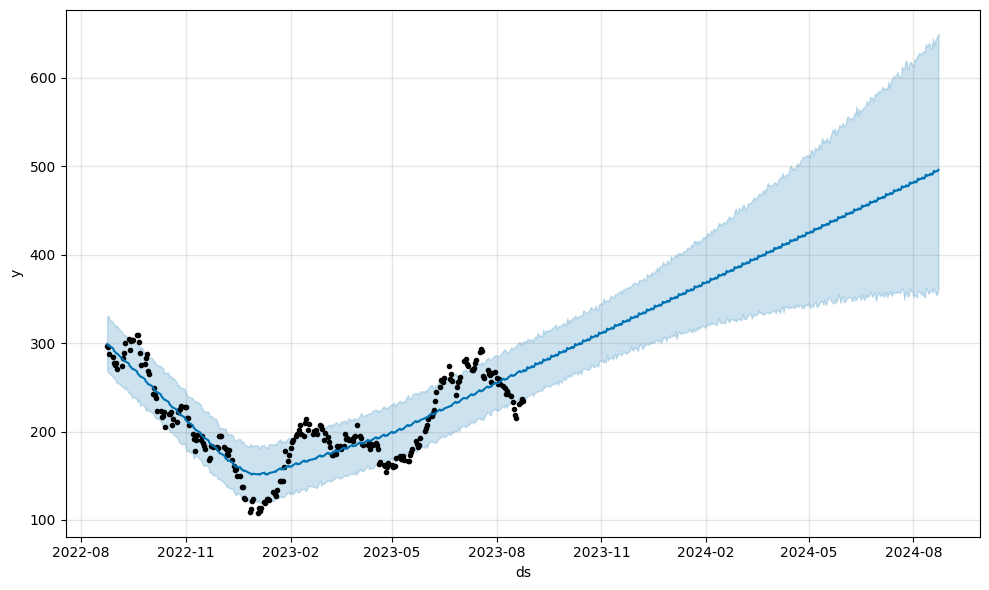

In [58]:
plot = model.plot(forecast, xlabel = 'ds', ylabel = 'y')

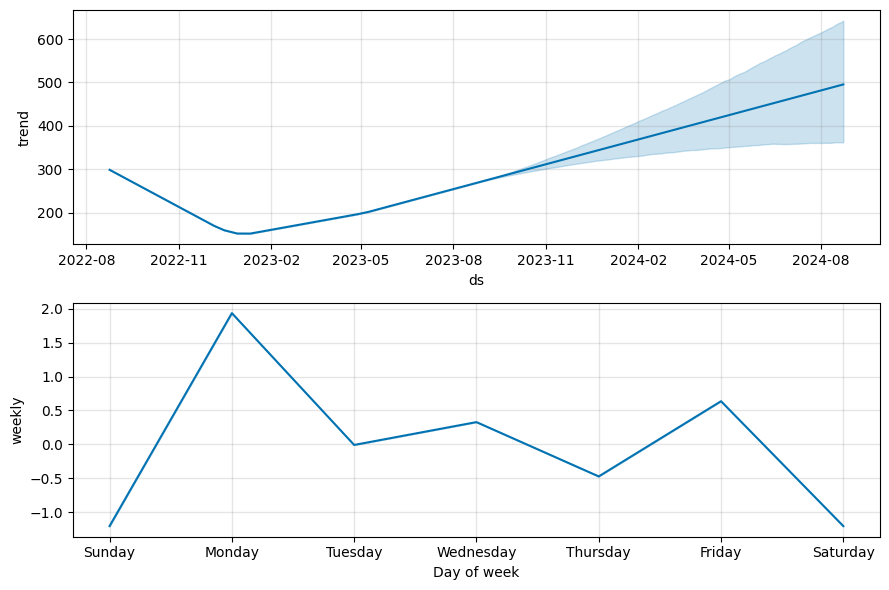

In [59]:
plot2 = model.plot_components(forecast)

In [64]:
from google.colab import files
forecast.to_csv('/gdrive/My Drive/Colab_Notebooks/TSLA Stock Price Prediction/tesla_forecast.csv', index= False)